In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dahanjunho","key":"fda89cc2caacbc005d048318703b6a8f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 2.81MB/s]


In [ ]:
!unzip heart-attack-analysis-prediction-dataset.zip

Archive:  heart-attack-analysis-prediction-dataset.zip
  inflating: heart.csv               
  inflating: o2Saturation.csv        


In [ ]:
!mkdir /content/drive/MyDrive/ML_Data/kaggle/heart_attack_analysis

In [ ]:
!cp heart.csv /content/drive/MyDrive/ML_Data/kaggle/heart_attack_analysis
!cp o2Saturation.csv /content/drive/MyDrive/ML_Data/kaggle/heart_attack_analysis

In [ ]:
!rm heart-attack-analysis-prediction-dataset.zip
!rm heart.csv
!rm o2Saturation.csv

# Load Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('/content/drive/MyDrive/ML_Data/kaggle/heart_attack_analysis/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* Age : Age of the patient

* Sex : Sex of the patient (1 = male, 0 = female)

* exang: exercise induced angina (1 = yes; 0 = no)

* ca: number of major vessels (0-3)

* cp : Chest Pain type

* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)

* chol : cholestoral in mg/dl fetched via BMI sensor

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* rest_ecg : resting electrocardiographic results

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved

* target : 0= less chance of heart attack 1= more chance of heart attack

In [49]:
saturation = pd.read_csv('/content/drive/MyDrive/ML_Data/kaggle/heart_attack_analysis/o2Saturation.csv')
saturation.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


# EDA

In [50]:
saturation.describe()

,98.6
count,3585.000000
mean,98.239275
std,0.726336
min,96.500000
25%,97.600000
50%,98.600000
75%,98.600000
max,99.600000


In [51]:
df.shape

(303, 14)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [53]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [54]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [44]:
df['output'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: output, dtype: float64

* pretty well balanced output

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [55]:
list(pd.Series(df.columns).drop([0, 3, 4, 7, 13]))

['sex', 'cp', 'fbs', 'restecg', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

In [58]:
num_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
cat_columns = list(pd.Series(df.columns).drop([0, 3, 4, 7, 9, 13]))

## Univariate Analysis

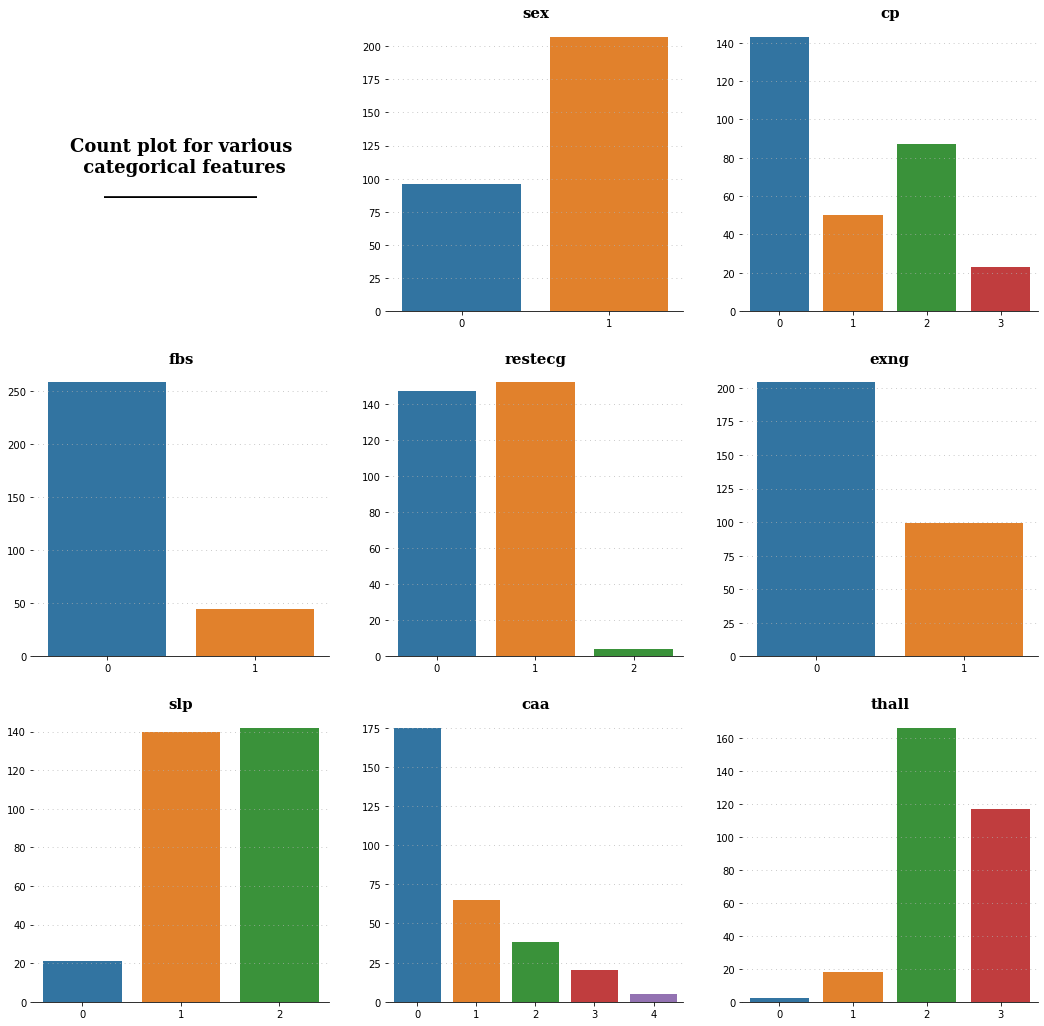

In [78]:
plt.figure(figsize=(18,18))

ax = plt.subplot(3,3,1)
ax.text(0.5,0.5,
        'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.set_xticklabels([])
ax.set_yticklabels([])

for i, col in enumerate(cat_columns):
  ax = plt.subplot(3,3,i+2)
  ax.grid(linestyle=":", axis='y', dashes=(1,5))
  ax.set_title(col, fontweight='bold', fontfamily='serif', fontsize=15)
  sns.countplot(x=col, data=df)
  ax.set_xlabel("")
  ax.set_ylabel("")
  for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

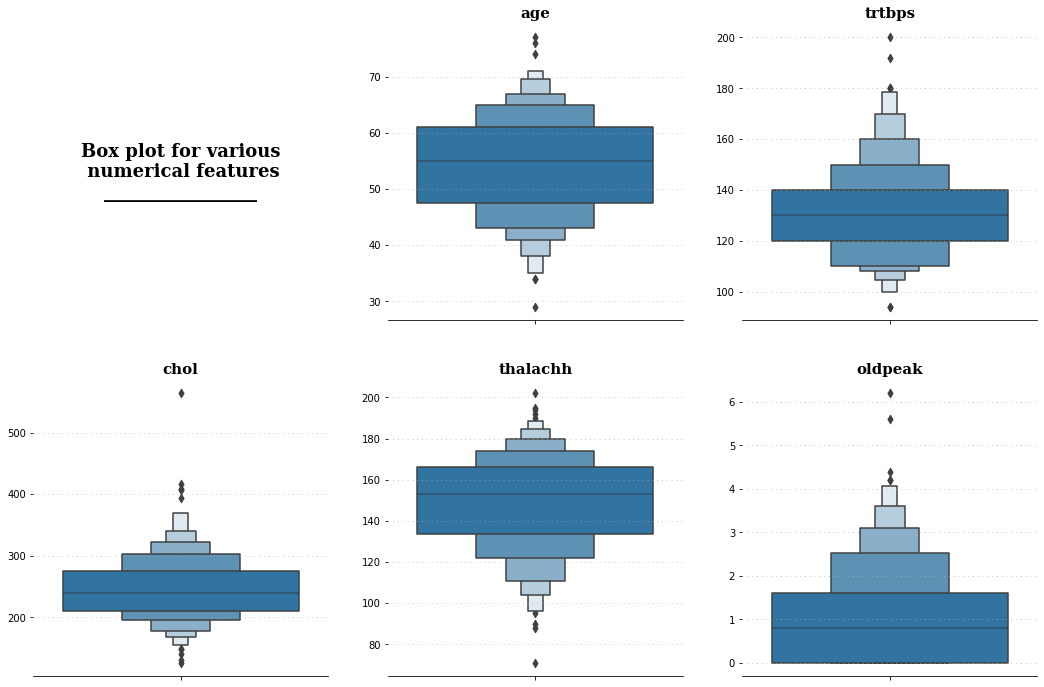

In [83]:
plt.figure(figsize=(18,12))

ax = plt.subplot(2,3,1)
ax.text(0.5,0.5,
        'Box plot for various\n numerical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.set_xticklabels([])
ax.set_yticklabels([])

for i, col in enumerate(num_columns):
  ax = plt.subplot(2,3,i+2)
  ax.grid(linestyle=":", axis='y', dashes=(1,5))
  ax.set_title(col, fontweight='bold', fontfamily='serif', fontsize=15)
  sns.boxenplot(y=col, data=df)
  ax.set_xlabel("")
  ax.set_ylabel("")
  for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

* There are some outliers in columns

## Bivariate Analysis

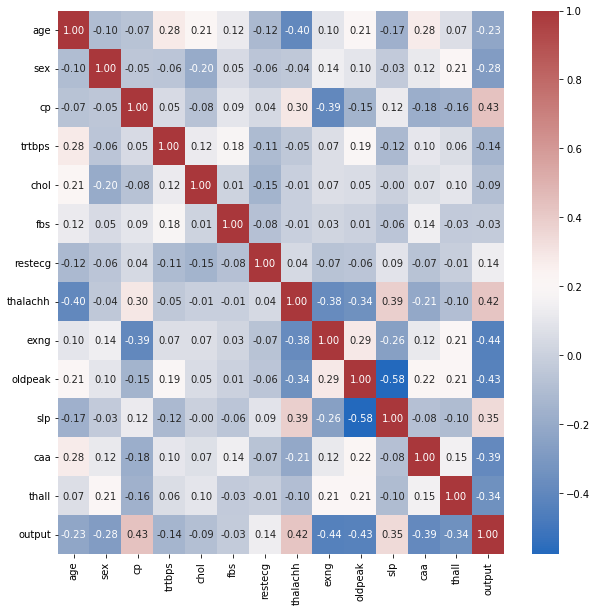

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='vlag')

# Modeling

In [136]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [89]:
df1 = df.copy()

In [90]:
# One-hot encoding

df1 = pd.get_dummies(df1, columns=cat_columns, drop_first=True)

In [112]:
# Defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

In [113]:
# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[num_columns] = scaler.fit_transform(X[num_columns])

In [114]:
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [115]:
X.describe()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,0.081188,0.098646,-0.103173,0.149752,0.683168,0.165017,0.287129,0.075908,0.148515,...,0.326733,0.462046,0.468647,0.214521,0.125413,0.066007,0.016502,0.059406,0.547855,0.386139
std,0.672748,0.876907,0.816232,0.704774,0.725672,0.466011,0.371809,0.453171,0.265288,0.356198,...,0.469794,0.499382,0.499842,0.411169,0.331734,0.248704,0.127605,0.236774,0.498528,0.487668
min,-1.925926,-1.800000,-1.795276,-2.523077,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.555556,-0.500000,-0.456693,-0.600000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.444444,0.500000,0.543307,0.400000,0.500000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.629630,3.500000,5.102362,1.507692,3.375000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
X.shape

(303, 22)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
y_train = y_train.to_numpy().flatten()
y_test = y_test.to_numpy().flatten()

## 1. LogisticRegression

In [127]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Test score of LogisticRegression: {score: .4f}")

Test score of LogisticRegression:  0.9016


In [128]:
param_grid = {
    'penalty':['l1','l2','elasticnet'],
    'tol':[1e-4,1e-3,1e-2],
    'C':[1e-2,1e-1,1,10,100],
    'solver':['lbfgs', 'liblinear']
}

grid_log = GridSearchCV(log_reg, param_grid, cv=3, n_jobs=-1, verbose=3)
grid_log.fit(X_train, y_train)

grid_log.best_params_

Fitting 3 folds for each of 90 candidates, totalling 270 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}

In [129]:
grid_log.best_score_

0.8265946502057613

In [130]:
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(X_train, y_train)
y_pred_best = grid_log_best.predict(X_test)
score = accuracy_score(y_test, y_pred_best)

print(f"Test score of LogisticRegression: {score: .4f}")

Test score of LogisticRegression:  0.8689


## 2. SVC

In [132]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Test score of SVC: {score: .4f}')

Test score of SVC:  0.8525


In [143]:
param_grid = {
    'C':np.arange(1,10,1),
    'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]
}

grid_svc = GridSearchCV(svc, param_grid, cv=3, n_jobs=-1, verbose=3)
grid_svc.fit(X_train, y_train)

print('-'*25)
print("best params: ",grid_svc.best_params_)
print("best score: ",grid_svc.best_score_)
print("best estimator: ",grid_svc.best_estimator_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
-------------------------
best params:  {'C': 1, 'gamma': 0.05}
best score:  0.8183127572016461
best estimator:  SVC(C=1, gamma=0.05)


In [145]:
grid_svc_best = grid_svc.best_estimator_
grid_svc_best.fit(X_train, y_train)
y_pred = grid_svc_best.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Test score of SVC: {score: .4f}')

Test score of SVC:  0.8525


## 3. SGDClassifier

In [137]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Test score of SGDClassifier: {score: .4f}')

Test score of SGDClassifier:  0.8361


In [138]:
param_grid = {
    'penalty':['l1','l2','elasticnet'],
    'tol':[1e-4,1e-3,1e-2],
    'alpha':[1e-5,1e-4,1e-3,1e-2,1e-1,1],
    'max_iter':[500,1000,3000]
}

grid_sgd = GridSearchCV(sgd_clf, param_grid, cv=3, verbose=3, n_jobs=-1)
grid_sgd.fit(X_train, y_train)
print('-'*50)
print("best params: ",grid_sgd.best_params_)
print("best score: ",grid_sgd.best_score_)
print("best estimator: ",grid_sgd.best_estimator_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
--------------------------------------------------
best params:  {'alpha': 0.001, 'max_iter': 500, 'penalty': 'l1', 'tol': 0.001}
best score:  0.822582304526749
best estimator:  SGDClassifier(alpha=0.001, max_iter=500, penalty='l1')


In [140]:
grid_sgd_best = grid_sgd.best_estimator_
grid_sgd_best.fit(X_train, y_train)
y_pred = grid_sgd_best.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Test score of SGDClassifier: {score: .4f}')

Test score of SGDClassifier:  0.8033


## 4. DecisionTree

In [146]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7213114754098361


## 5. RandomForestClassifier

In [147]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.7213114754098361
